In [31]:
!pip install -U scikit-learn scipy matplotlib
!pip install pandas
!pip install seaborn
!pip install plotly-express
!pip install -U scikit-learn

You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [73]:
#importing libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import plotly_express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

from plotly.offline import plot, iplot,init_notebook_mode
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer 

In [68]:
#Clean the data
data = pd.read_csv('garments_worker_productivity.csv')
data.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [69]:
df = data.copy()

In [13]:
df.shape

(1197, 15)

In [14]:
df.info()


#     The dataset contains 1197 rows and 15 columns

#     Attribute Information:

#     date : Date in MM-DD-YYYY
#     day : Day of the Week
#     quarter : A portion of the month. A month was divided into four quarters
#     department : Associated department with the instance
#     teamno : Associated team number with the instance
#     noofworkers : Number of workers in each team
#     noofstylechange : Number of changes in the style of a particular product
#     targetedproductivity : Targeted productivity set by the Authority for each team for each day.
#     smv : Standard Minute Value, it is the allocated time for a task
#     wip : Work in progress. Includes the number of unfinished items for products
#     overtime : Represents the amount of overtime by each team in minutes
#     incentive : Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.
#     idletime : The amount of time when the production was interrupted due to several reasons
#     idlemen : The number of workers who were idle due to production interruption
#     actual_productivity : The actual % of productivity that was delivered by the workers. It ranges from 0-1.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [15]:
df.isna().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

,Total,Percent
wip,506,0.422723
date,0,0.000000
quarter,0,0.000000
department,0,0.000000
day,0,0.000000


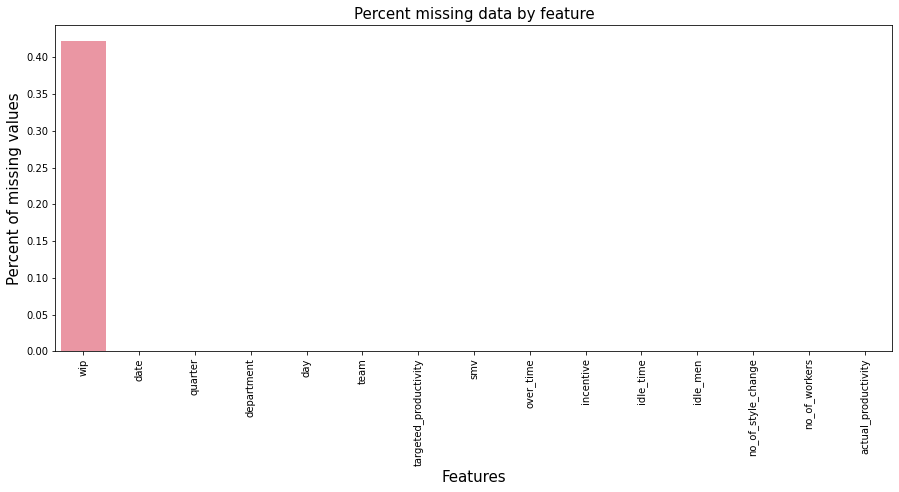

In [74]:
# Total 17 parameters.
# One parameter (wip) has the missing rate up to 42%.


total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])

plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

missing_data.head()




In [17]:
df['date'] = pd.to_datetime(df['date'])
df['month_name'] = df['date'].dt.month_name()




In [96]:
# Handling missing data
# Sort the value by team 
df.sort_values(by='team', ascending=True)

# Use kNN to handle missing value
imputer = KNNImputer(n_neighbors=5)
df['team'] = imputer.fit_transform(df[['team']])

df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,overtime_in_hours
0,1/1/2015,Quarter1,sweing,Thursday,8.0,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,118.0
1,1/1/2015,Quarter1,finishing,Thursday,1.0,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500,16.0
2,1/1/2015,Quarter1,sweing,Thursday,11.0,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,61.0
3,1/1/2015,Quarter1,sweing,Thursday,12.0,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,61.0
4,1/1/2015,Quarter1,sweing,Thursday,6.0,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10.0,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333,16.0
1193,3/11/2015,Quarter2,finishing,Wednesday,8.0,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625,16.0
1194,3/11/2015,Quarter2,finishing,Wednesday,7.0,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625,16.0
1195,3/11/2015,Quarter2,finishing,Wednesday,9.0,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889,30.0


In [92]:
#create a new feature which has overtime measured in hours
df['overtime_in_hours'] = df['over_time'].apply(lambda x: x/60) 

In [19]:
df['quarter'].value_counts()

Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: int64

In [20]:
df['department'].value_counts().index.to_list()

['sweing', 'finishing ', 'finishing']

In [21]:
#2x finishing => combine into 1
df['department'].value_counts().index.to_list()

['sweing', 'finishing ', 'finishing']

In [22]:
df['department'] = df['department'].apply(lambda x: 'finishing' if x == ('finishing ' or 'finishing' ) else 'sewing' )

In [23]:
df['day'].value_counts()

Wednesday    208
Sunday       203
Tuesday      201
Monday       199
Thursday     199
Saturday     187
Name: day, dtype: int64

In [24]:
dept = df.department.value_counts().reset_index()
dept.rename(columns = {'index':'department', 'department':'total_num'},inplace=True)


,department,total_num
0,sewing,940
1,finishing,257


In [46]:
#Data analysis

fig = go.Figure(data=[go.Pie(labels=dept.department.to_list(),
                             values=dept.total_num.to_list())])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=['#ADEFD1FF', '#00203FFF'], line=dict(color='#000000', width=2)))
fig.show()

In [39]:
#no need this one, for testing purpose
qdf = df['quarter'].value_counts().reset_index()
qdf.rename(columns={'index': 'quarters', 'quarter': 'days_in_each_quarter'}, inplace=True)
fig = go.Figure(data=[go.Pie(labels=qdf.quarters.to_list(), values=qdf.days_in_each_quarter.to_list(), pull=[0, 0, 0, 0, 0.4], hole=.3)])
fig.show()

In [40]:
fig = px.histogram(df, x="targeted_productivity", nbins=20, color_discrete_sequence=['rgb(55, 83, 109)'])

fig.update_layout(
    title = 'Distribution of Targeted productivity',
    title_x = 0.5,
    xaxis_tickfont_size = 14,
    
    xaxis = dict(
        title = 'Targeted Productivity',
        titlefont_size = 16,
        tickfont_size = 14,
    ),
    
    yaxis = dict(
        title = 'Records',
        titlefont_size = 16,
        tickfont_size = 14,
    ),
    barmode = 'group',
    bargap = 0.15,
    bargroupgap = 0.1,
)

fig.show()

# Target productivity by authorities: 
# 0.8 => 45.2% (540/1196)
# (0.7 + 0.75) => 38.3% (458/1196)
# Remainings: 16.5%

In [28]:
fig = px.histogram(df, x="actual_productivity", nbins=20, color_discrete_sequence=['rgb(242,170,76)'])

fig.update_layout(
    title = 'Distribution of Actual productivity',
    title_x = 0.5,
    xaxis_tickfont_size = 14,
    
    xaxis = dict(
        title = 'Actual Productivity',
        titlefont_size = 16,
        tickfont_size = 14,
    ),
    
    yaxis = dict(
        title = 'Records',
        titlefont_size = 16,
        tickfont_size = 14,
    ),
    
    barmode = 'group',
    bargap = 0.15,
    bargroupgap = 0.1,
)

fig.show()

# Work better than expected (> 0.825): 